In [1]:
from google.colab import files
uploaded = files.upload()   # upload Titanic-Dataset.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
df = pd.read_csv("Titanic-Dataset.csv")   # use exact name you uploaded
print("Shape of dataset:", df.shape)
print(df.head())

# 2) Basic Info
print("\n=== Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Summary Statistics ===")
print(df.describe(include="all"))

Shape of dataset: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

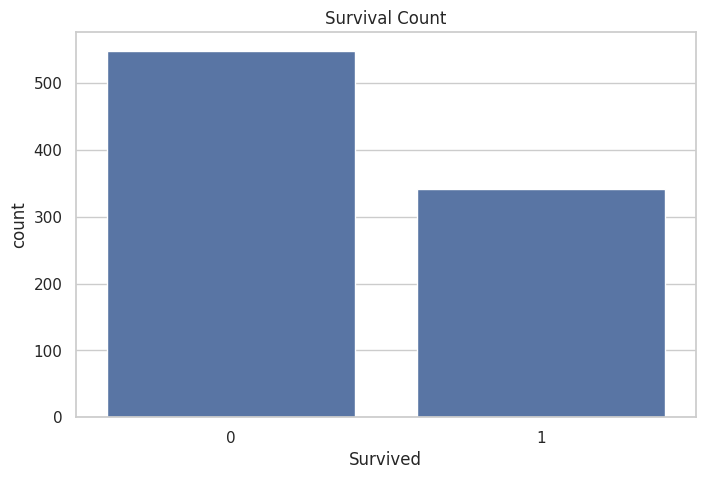

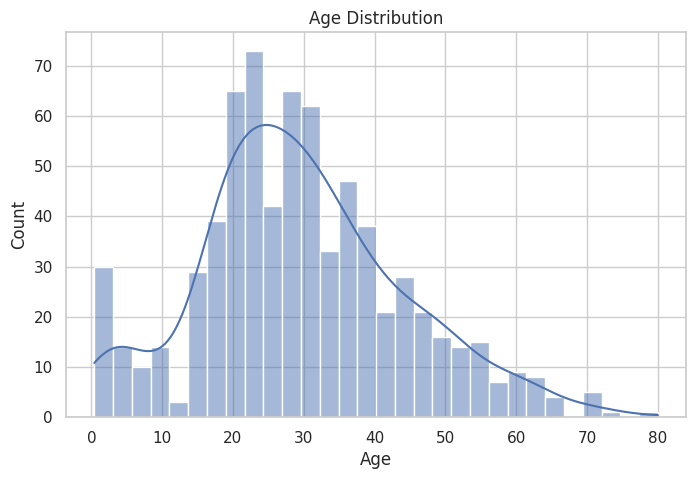

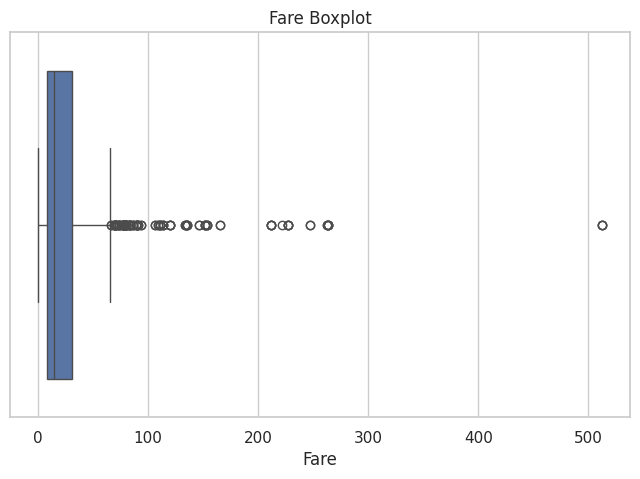

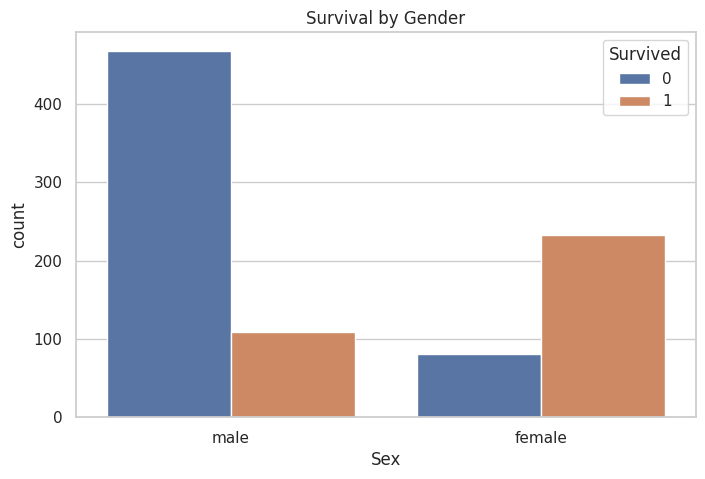

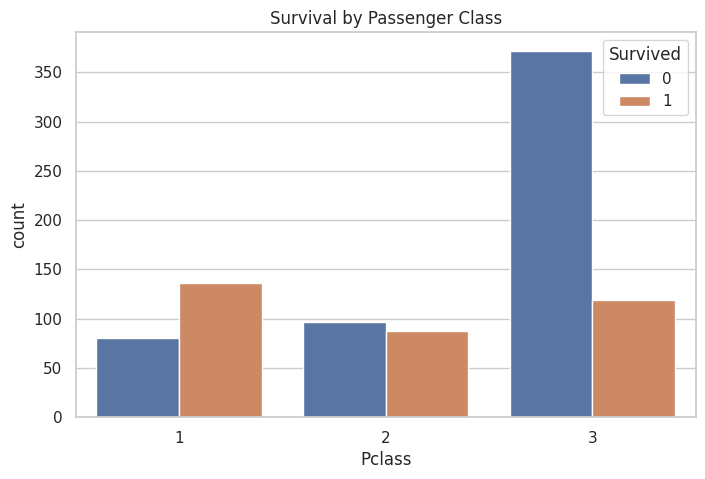

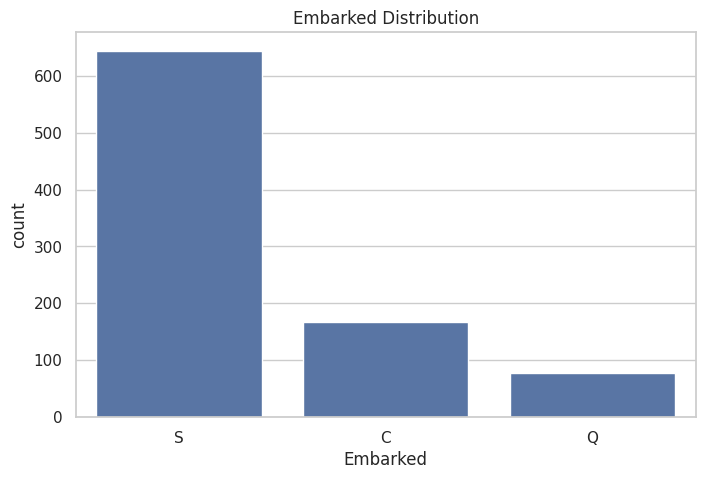

In [3]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x=df["Fare"])
plt.title("Fare Boxplot")
plt.show()

# 4) Categorical Analysis
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.countplot(x="Embarked", data=df)
plt.title("Embarked Distribution")
plt.show()

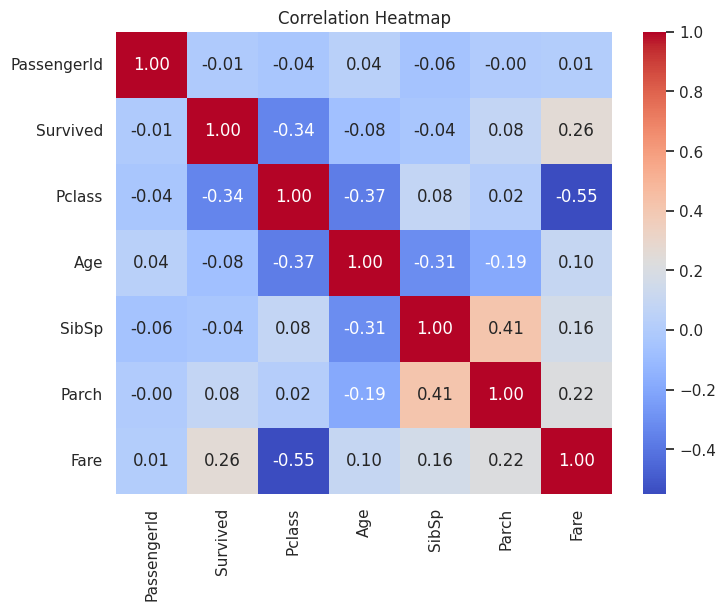


Survival rate by Sex:
Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

Survival rate by Pclass:
Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64


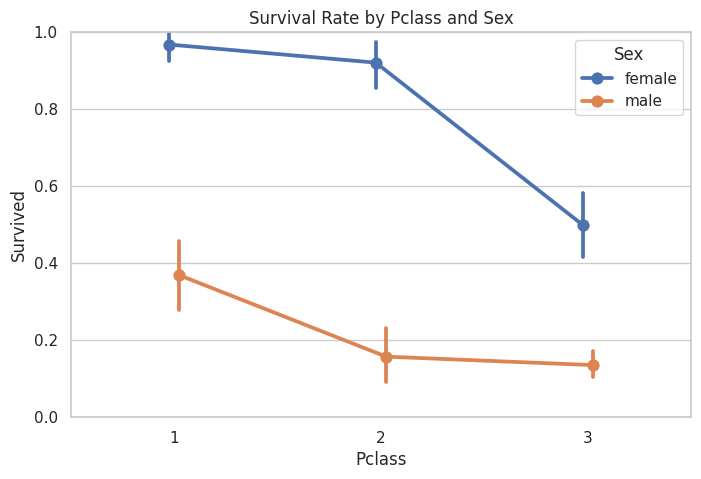

In [5]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


print("\nSurvival rate by Sex:")
print(df.groupby("Sex")["Survived"].mean().round(2))

print("\nSurvival rate by Pclass:")
print(df.groupby("Pclass")["Survived"].mean().round(2))

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df, dodge=True)
plt.title("Survival Rate by Pclass and Sex")
plt.ylim(0,1)
plt.show()